# show GT COCO

## main

/home/jiangtianbin/mmyolo
loading annotations into memory...
Done (t=0.17s)
creating index...
index created!
Total number of images：4769
Total number of Categories : 3
Categories: 
car large_vehicle person

bbox x1y1wh =  [144.29285430908203, 226.36742782592773, 53.425262451171875, 24.39358901977539]
bbox x1y1wh =  [0.0, 226.04267120361328, 88.81348609924316, 60.498390197753906]
bbox x1y1wh =  [590.4581909179688, 199.0018196105957, 49.54180808203125, 44.394588470458984]
bbox x1y1wh =  [199.56434631347656, 217.99283599853516, 29.458465576171875, 33.223453521728516]
bbox x1y1wh =  [0.0, 201.06887817382812, 89.55962371826172, 41.496246337890625]
bbox x1y1wh =  [287.1709442138672, 224.75198364257812, 22.526290893554688, 15.135948181152344]


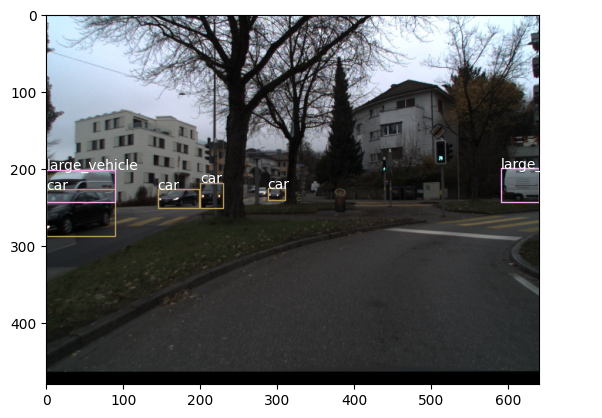

In [2]:
# changed from browse_coco_json.py

%cd ~/mmyolo
from pathlib import Path
import argparse
import os.path as osp

import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
from pycocotools.coco import COCO


def show_gt_by_find(args, ann_file, show_label_box, image_id=None, image_path=None):

    if image_id is not None:
        assert image_path is None
    elif image_path is not None:
        assert image_id is None

    if args.data_root is not None:
        coco = COCO(osp.join(args.data_root, ann_file))
    else:
        coco = COCO(ann_file)

    print(f'Total number of images：{len(coco.getImgIds())}')
    categories = coco.loadCats(coco.getCatIds())
    category_names = [category['name'] for category in categories]
    print(f'Total number of Categories : {len(category_names)}')
    print('Categories: \n{}\n'.format(' '.join(category_names)))

    if args.category_names is None:
        category_ids = []
    else:
        assert set(category_names) > set(args.category_names)
        category_ids = coco.getCatIds(args.category_names)


    if image_path is not None:
        for img in coco.imgs.values():
            if str(image_path) == img['file_name']:
                image_id = img['id']
                break
    if image_id is None:
        assert 0, 'not find'

    image_data = coco.loadImgs(image_id)[0]
    image_path = osp.join(args.data_root, image_data['file_name'])
    
    annotation_ids = coco.getAnnIds(
        imgIds=image_data['id'], catIds=category_ids, iscrowd=0)


    annotations = coco.loadAnns(annotation_ids)

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure()
    plt.imshow(image)

    if args.disp_all:
        coco.showAnns(annotations)
    else:
        show_bbox_only(coco, annotations, show_label_bbox=show_label_box)

    plt.show()

    plt.close()


def show_bbox_only(coco, anns, show_label_bbox=True, is_filling=False):
    """Show bounding box of annotations Only."""
    if len(anns) == 0:
        return

    ax = plt.gca()
    ax.set_autoscale_on(False)

    image2color = dict()
    for cat in coco.getCatIds():
        image2color[cat] = (np.random.random((1, 3)) * 0.7 + 0.3).tolist()[0]

    polygons = []
    colors = []

    for ann in anns:
        color = image2color[ann['category_id']]
        print('bbox x1y1wh = ', ann['bbox'])
        bbox_x, bbox_y, bbox_w, bbox_h = ann['bbox']
        poly = [[bbox_x, bbox_y], [bbox_x, bbox_y + bbox_h],
                [bbox_x + bbox_w, bbox_y + bbox_h], [bbox_x + bbox_w, bbox_y]]
        polygons.append(Polygon(np.array(poly).reshape((4, 2))))
        colors.append(color)

        if show_label_bbox:
            label_bbox = dict(facecolor=color,
                            #    alpha=0.4
                            )
        else:
            label_bbox = None

        ax.text(
            bbox_x,
            bbox_y,
            '%s' % (coco.loadCats(ann['category_id'])[0]['name']),
            color='white',
            bbox=label_bbox)

    if is_filling:
        p = PatchCollection(
            polygons, facecolor=colors, linewidths=0, alpha=0.4)
        ax.add_collection(p)
    p = PatchCollection(
        polygons, facecolor='none', edgecolors=colors, linewidths=1)
    ax.add_collection(p)

class Args:
    data_root = Path('data/DSEC/')

    # disp_all: Whether to display all types of data, such as bbox and mask.
    # False: only show bbox
    disp_all = False
    category_names = None


# ann_path example: 'train/soft_ann/soft_ann_test_LN.json'
# image_path is relative path in GT json file
    

# view = 'train_LN'
# view = 'test_LN'

# view = 'train_LT'
view = 'test_LT'

# view = 'train_LNE'
# view = 'test_LNE'

# view = 'train_RNE'
# view = 'test_RNE'

# view = 'train_R90'
# view = 'test_R90'

# view = 'train_R180'
# view = 'test_R180'

# view = 'train_R90E'
# view = 'test_R90E'

# view = 'train_R180E'
# view = 'test_R180E'

if view == 'train_LN':
    ann_path = 'train/soft_ann/soft_ann_train_LN.json'
elif view == 'test_LN':
    ann_path = 'train/soft_ann/soft_ann_test_LN.json'
    image_path = 'train/images/zurich_city_04_a/images/left/rectified/000236.png'

elif view == 'train_LT':
    ann_path = 'train/soft_ann/soft_ann_train_LT.json'
    image_path = 'train/images/zurich_city_11_c/images/transformed_images/000300.png'
elif view == 'test_LT':
    ann_path = 'train/soft_ann/soft_ann_test_LT.json'
    image_path = 'train/images/zurich_city_04_a/images/transformed_images/000236.png'

elif view == 'train_LNE':
    ann_path = 'train/soft_ann/soft_ann_train_LNE.json'
    image_path = 'train/images/interlaken_00_f/images/left_e_size/000050.png'
elif view == 'test_LNE':
    ann_path = 'train/soft_ann/soft_ann_test_LNE.json'
    image_path = 'train/images/zurich_city_04_a/images/left_e_size/000236.png'

elif view == 'train_RNE':
    ann_path = 'train/soft_ann/soft_ann_train_RNE.json'
    image_path = 'train/images/interlaken_00_f/images/normal_e_size/000050.png'
elif view == 'test_RNE':
    ann_path = 'train/soft_ann/soft_ann_test_RNE.json'
    image_path = 'train/images/zurich_city_04_a/images/normal_e_size/000236.png'

elif view == 'train_R90':
    ann_path = 'train/soft_ann/soft_ann_train_R90.json'
    image_path = 'train/images/interlaken_00_f/images/rotation_90/000150.png'
elif view == 'test_R90':
    ann_path = 'train/soft_ann/soft_ann_test_R90.json'
    image_path = 'train/images/zurich_city_04_a/images/rotation_90/000100.png'

elif view == 'train_R180':
    ann_path = 'train/soft_ann/soft_ann_train_R180.json'
    image_path = 'train/images/interlaken_00_f/images/rotation_180/000150.png'
elif view == 'test_R180':
    ann_path = 'train/soft_ann/soft_ann_test_R180.json'
    image_path = 'train/images/zurich_city_04_a/images/rotation_180/000100.png'

elif view == 'train_R90E':
    ann_path = 'train/soft_ann/soft_ann_train_R90E.json'
    image_path = 'train/images/interlaken_00_f/images/rotation_90_e_size/000150.png'
elif view == 'test_R90E':
    ann_path = 'train/soft_ann/soft_ann_test_R90E.json'
    image_path = 'train/images/zurich_city_04_a/images/rotation_90_e_size/000100.png'

elif view == 'train_R180E':
    ann_path = 'train/soft_ann/soft_ann_train_R180E.json'
    image_path = 'train/images/interlaken_00_f/images/rotation_180_e_size/000150.png'
elif view == 'test_R180E':
    ann_path = 'train/soft_ann/soft_ann_test_R180E.json'
    image_path = 'train/images/zurich_city_04_a/images/rotation_180_e_size/000100.png'


args = Args()
show_gt_by_find(args,
                ann_file = Path(ann_path),
                show_label_box = False,
                image_id = None ,
                image_path=Path(image_path)
                )